# Guessing BUILDING. MODELS

In [1]:
# basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# estimators


from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Classification Models
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


# tools
from sklearn.model_selection import train_test_split

# regression model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# classification model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

#Hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# To save the ML models
import joblib

# Functions

In [2]:
def save_model (model, file_name):
    try:
        path = '/home/ale/Dropbox/UBIQUM/4.DeepAnalytics&Visualization/T4M3.WiFiLocationing/MLmodels/'
 
        # Save the model as a pickle in a file
        joblib.dump(model, path + file_name)
        print('Model Saved')
    except:
        print('Model NOT!! Saved')

In [3]:
def load_model (file_name):
    path = '/home/ale/Dropbox/UBIQUM/4.DeepAnalytics&Visualization/T4M3.WiFiLocationing/MLmodels/'
 
    # Load the model from the file
    model_from_joblib = joblib.load(path + file_name)
    
    return model_from_joblib

In [4]:
def makePredictions(loaded_model, X_test, y_test):
    # make predictions
    model_predictions = loaded_model.predict(X_test)
    
    # Accuracy 
    accuracy = accuracy_score(y_test, model_predictions) 
    print("Accuracy: ", round(accuracy, 3))
    
    # Confussion Matrix
    cm = confusion_matrix(y_test, model_predictions, labels = loaded_model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                  display_labels=loaded_model.classes_, 
                               #   cmap=plt.cm.Blues, 
                                 # normalize=True
                                 )
       
    disp.plot() 
    
    # classification_report
    #print("Classification report ")
    #print(classification_report(y_test, model_predictions, labels = loaded_model.classes_))

In [5]:
path = '/home/ale/Dropbox/UBIQUM/4.DeepAnalytics&Visualization/T4M3.WiFiLocationing/Data/'
file_X = "1_DataPrepro_Building_X.csv"
file_y = "1_DataPrepro_Building_y.csv"

Saved_X = pd.read_csv(path + file_X)
Saved_y = pd.read_csv(path + file_y)

print(Saved_y.head())
Saved_X.head()


   BUILDINGID
0           1
1           2
2           2
3           2
4           2


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP509,WAP510,WAP511,WAP512,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-83,-85,100,100,100
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


## 1.6 Train/Test Split

In [6]:
# define X and y
X = Saved_X
y = Saved_y

# define train/test_ratio
train_ratio = 0.75
test_ratio = 0.25

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1-train_ratio) )

# check dimensionsc
#print('DF: ', Tdata_Building.shape)
print('X:', X.shape,'y:', y.shape)
print('X_train:', X_train.shape,'y_train:', y_train.shape)
print('X_test: ', X_test.shape,' y_test: ', y_test.shape)

X: (8972, 435) y: (8972, 1)
X_train: (6729, 435) y_train: (6729, 1)
X_test:  (2243, 435)  y_test:  (2243, 1)


### Load k-NN

Accuracy:  0.998


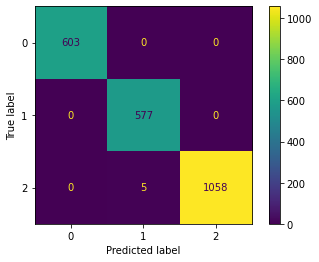

In [7]:
file = 'Building_KNN.joblib'

# Load the model from the file
KNN_from_joblib = load_model(file)

# Use the loaded model to make predictions
makePredictions(KNN_from_joblib, X_test, y_test)

### Load RF

Accuracy:  0.996


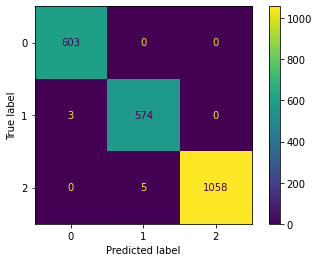

In [8]:
file = 'Building_RF.joblib'

# Load the model from the file
RF_from_joblib = load_model(file)

# Use the loaded model to make predictions
# Use the loaded model to make predictions
makePredictions(RF_from_joblib, X_test, y_test)

### Load Log Reg

Accuracy:  0.998


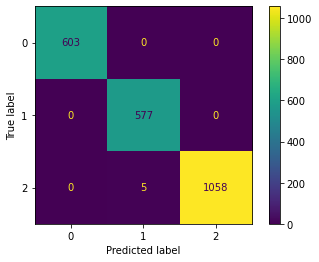

In [9]:
file = 'Building_LR.joblib'

#Load the model from the file
LR_from_joblib = load_model(file)

# Use the loaded model to make predictions
makePredictions(LR_from_joblib, X_test, y_test)